In [1]:
import numpy as np
import math
import os
import random
import rasterio
import matplotlib.pyplot as plt

In [2]:
# 1. Перебор параметров окна -undone-
# 2. Сохранять в текст результаты фильтрации -undone-
# 3. Добавить зашумление через numpy.random.uniform [-0.5, 0.5] -check-

In [60]:
R = 50

arr_sph = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr_sph.shape[0]
ncols = arr_sph.shape[1]
#arr1

In [23]:
ncols

101

In [61]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr_sph[x][y] = z
        except ValueError:
            pass

print(np.array_str(arr_sph, precision=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
print(np.max(arr_sph), np.min(arr_sph))

50.0 0.0


In [63]:
# Noising
dict_ns = {}
arr_n = np.random.randn(nrows, ncols)  # standard normal distribution
arr_sph_n = arr_sph + arr_n
arr_sph_n_2 = arr_sph + arr_n * 2
arr_sph_n_05 = arr_sph + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_sph_un = arr_sph + arr_un
arr_sph_un_2 = arr_sph + arr_un * 2
arr_sph_un_05 = arr_sph + arr_un * 0.5

dict_ns['sph_n_1'], dict_ns['sph_n_05'], dict_ns['sph_n_2'], \
dict_ns['sph_un_1'], dict_ns['sph_un_05'], dict_ns['sph_un_2'] = \
arr_sph_n, arr_sph_n_05, arr_sph_n_2, arr_sph_un, arr_sph_un_05, arr_sph_un_2

dict_ns

{'sph_n_1': array([[ 1.13960405,  0.76185956,  0.19961258, ..., -1.7666932 ,
          0.61861793, -0.43590802],
        [-0.85397413, -1.03262836, -0.02003466, ...,  0.19841971,
          0.39231914, -0.05077328],
        [ 0.39531803,  0.41829849,  0.5987856 , ..., -1.11193069,
          0.00920532,  0.09595752],
        ...,
        [-0.94583555, -0.44944566, -1.45095733, ..., -0.58244275,
          0.06043953,  0.19571175],
        [ 1.06739778,  0.91896462,  0.09944597, ..., -0.63176866,
          1.32209642,  1.28783725],
        [-0.89107609, -0.78511228, -1.16405446, ..., -1.90542604,
         -1.31775383,  1.9960019 ]]),
 'sph_n_05': array([[ 0.56980202,  0.38092978,  0.09980629, ..., -0.8833466 ,
          0.30930897, -0.21795401],
        [-0.42698706, -0.51631418, -0.01001733, ...,  0.09920985,
          0.19615957, -0.02538664],
        [ 0.19765901,  0.20914925,  0.2993928 , ..., -0.55596535,
          0.00460266,  0.04797876],
        ...,
        [-0.47291777, -0.224722

In [27]:
print(np.max(arr_sph), np.min(arr_sph), '\n')

print(np.max(arr_n), np.min(arr_n), '\n')
print(np.max(arr_sph_n_05), np.min(arr_sph_n_05))
print(np.max(arr_sph_n), np.min(arr_sph_n))
print(np.max(arr_sph_n_2), np.min(arr_sph_n_2), '\n')

print(np.max(arr_sph_un_05), np.min(arr_sph_un_05))
print(np.max(arr_sph_un), np.min(arr_sph_un))
print(np.max(arr_sph_un_2), np.min(arr_sph_un_2))

50.0 0.0 

3.409151833975558 -3.975122921640265 

50.84288150587391 -1.6511896839656341
52.08885637268245 -3.3023793679312683
55.22875974328323 -6.604758735862537 

50.44381856080753 -0.49984340424593643
50.93766214664635 -0.9996868084918729
51.92534931832401 -1.9993736169837457


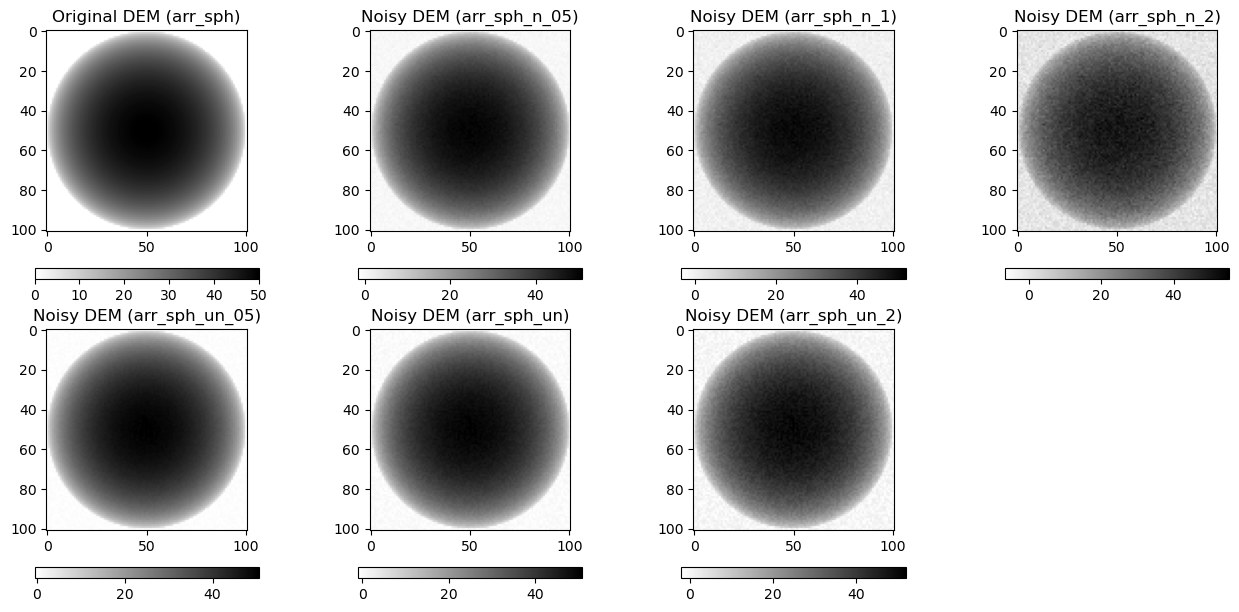

In [64]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_sph)')
plt.imshow(arr_sph, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contourf(arr_sph)

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_sph_n_05)')
plt.imshow(arr_sph_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_sph_n_1)')
plt.imshow(arr_sph_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_sph_n_2)')
plt.imshow(arr_sph_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 5)
ax5.set_title('Noisy DEM (arr_sph_un_05)')
plt.imshow(arr_sph_un_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 6)
ax6.set_title('Noisy DEM (arr_sph_un)')
plt.imshow(arr_sph_un, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 7)
ax7.set_title('Noisy DEM (arr_sph_un_2)')
plt.imshow(arr_sph_un_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.show()

In [10]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_sph

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    

for _ in dict_ns:
    data = dict_ns[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemisphere" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [75]:
#hemicylinder
R = 30

arr_cyl = np.zeros((int(2*R), int(2*R)+1), dtype = 'float')
nrows = arr_cyl.shape[0]
ncols = arr_cyl.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = -math.sqrt(R**2 - (float(y)-R)**2)
            arr_cyl[x][y] = z
        except ValueError:
            pass

#arr_c

In [76]:
np.max(arr_cyl)

-0.0

In [77]:
# Noising
dict_nc = {}
arr_n = np.random.randn(nrows, ncols) # standart normal distribution
arr_cyl_n = arr_cyl + arr_n
arr_cyl_n_2 = arr_cyl + arr_n * 2
arr_cyl_n_05 = arr_cyl + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_cyl_un = arr_cyl + arr_un
arr_cyl_un_2 = arr_cyl + arr_un * 2
arr_cyl_un_05 = arr_cyl + arr_un * 0.5

dict_nc['cyl_n_1'], dict_nc['cyl_n_05'], dict_nc['cyl_n_2'], \
dict_nc['cyl_un_1'], dict_nc['cyl_un_05'], dict_nc['cyl_un_2'] = \
arr_cyl_n, arr_cyl_n_05, arr_cyl_n_2, arr_cyl_un, arr_cyl_un_05, arr_cyl_un_2

dict_ns

{'sph_n_1': array([[ 1.13960405,  0.76185956,  0.19961258, ..., -1.7666932 ,
          0.61861793, -0.43590802],
        [-0.85397413, -1.03262836, -0.02003466, ...,  0.19841971,
          0.39231914, -0.05077328],
        [ 0.39531803,  0.41829849,  0.5987856 , ..., -1.11193069,
          0.00920532,  0.09595752],
        ...,
        [-0.94583555, -0.44944566, -1.45095733, ..., -0.58244275,
          0.06043953,  0.19571175],
        [ 1.06739778,  0.91896462,  0.09944597, ..., -0.63176866,
          1.32209642,  1.28783725],
        [-0.89107609, -0.78511228, -1.16405446, ..., -1.90542604,
         -1.31775383,  1.9960019 ]]),
 'sph_n_05': array([[ 0.56980202,  0.38092978,  0.09980629, ..., -0.8833466 ,
          0.30930897, -0.21795401],
        [-0.42698706, -0.51631418, -0.01001733, ...,  0.09920985,
          0.19615957, -0.02538664],
        [ 0.19765901,  0.20914925,  0.2993928 , ..., -0.55596535,
          0.00460266,  0.04797876],
        ...,
        [-0.47291777, -0.224722

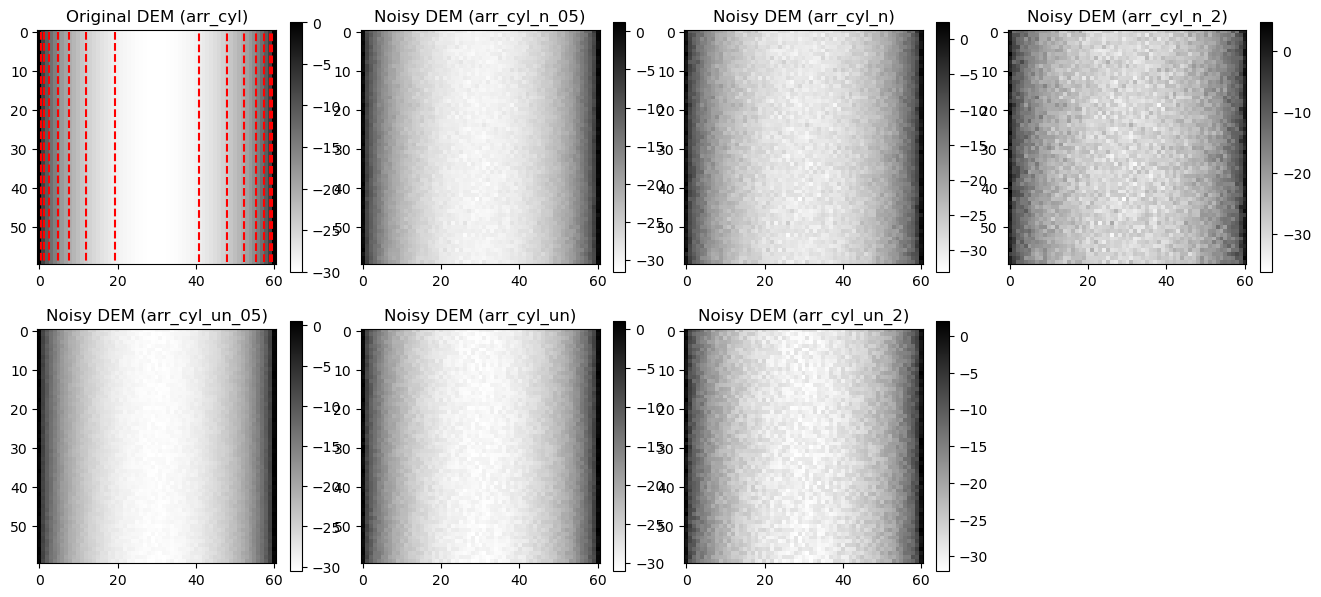

In [78]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_cyl)')
plt.imshow(arr_cyl, cmap='binary')
plt.colorbar(fraction=0.065)
plt.contour(arr_cyl, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_cyl_n_05)')
plt.imshow(arr_cyl_n_05, cmap='binary')
plt.colorbar(fraction=0.065)

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_cyl_n)')
plt.imshow(arr_cyl_n, cmap='binary')
plt.colorbar(fraction=0.065)

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_cyl_n_2)')
plt.imshow(arr_cyl_n_2, cmap='binary')
plt.colorbar(fraction=0.065)

ax5 = fig.add_subplot(3, 4, 5)
ax5.set_title('Noisy DEM (arr_cyl_un_05)')
plt.imshow(arr_cyl_un_05, cmap='binary')
plt.colorbar(fraction=0.065)

ax6 = fig.add_subplot(3, 4, 6)
ax6.set_title('Noisy DEM (arr_cyl_un)')
plt.imshow(arr_cyl_un, cmap='binary')
plt.colorbar(fraction=0.065)

ax7 = fig.add_subplot(3, 4, 7)
ax7.set_title('Noisy DEM (arr_cyl_un_2)')
plt.imshow(arr_cyl_un_2, cmap='binary')
plt.colorbar(fraction=0.065)

plt.show()

In [15]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_cyl

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_nc:
    data = dict_nc[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [50]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 50
b1 = 50

# a1 = 20
# b1 = 20

arr_par = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_par.shape[0]
ncols = arr_par.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
#             z = (x**2 / a1**2) + (y**2 / b1**2)
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_par[x][y] = z
        except ValueError:
            pass

#arr_hp

In [51]:
# Noising
dict_np = {}
arr_n = np.random.randn(nrows, ncols)
arr_par_n = arr_par + arr_n
arr_par_n_2 = arr_par + arr_n * 2
arr_par_n_05 = arr_par + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_par_un = arr_par + arr_un
arr_par_un_2 = arr_par + arr_un * 2
arr_par_un_05 = arr_par + arr_un * 0.5

dict_np['par_n_1'], dict_np['par_n_05'], dict_np['par_n_2'], \
dict_np['par_un_1'], dict_np['par_un_05'], dict_np['par_un_2'] = \
arr_par_n, arr_par_n_05, arr_par_n_2, arr_par_un, arr_par_un_05, arr_par_un_2

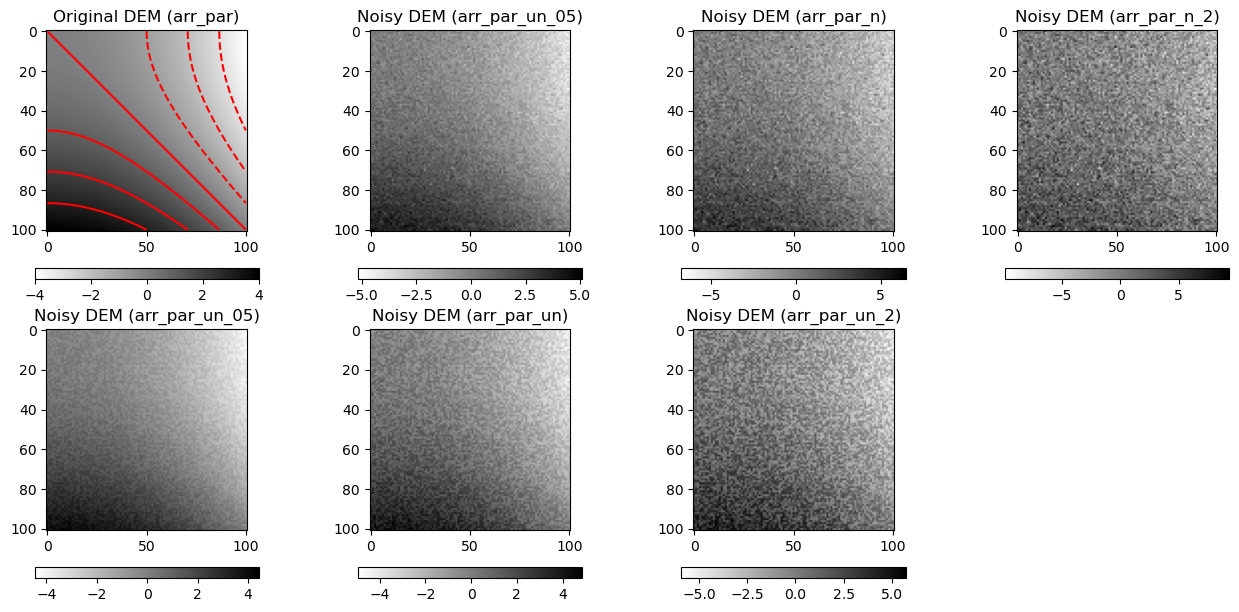

In [52]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_par, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
plt.contour(arr_par, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_par_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_par_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_par_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 5)
ax5.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_par_un_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 6)
ax6.set_title('Noisy DEM (arr_par_un)')
plt.imshow(arr_par_un, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 7)
ax7.set_title('Noisy DEM (arr_par_un_2)')
plt.imshow(arr_par_un_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.show()

In [19]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_par

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_np:
    data = dict_np[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\paraboloid" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [17]:
#inclined surface
# ax + by + cz + d = 0
# z = - (d+ax+by) / c

d = 10
a = 25
b = 25
c = 10

arr_inc = np.zeros((int(2*a)+1, int(2*b)+1), dtype = 'float')
nrows = arr_inc.shape[0]
ncols = arr_inc.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (d + a * x + b * y) / c
            arr_inc[x][y] = z
        except ValueError:
            pass

#arr_inc

In [18]:
#noising
#numpy.random.randn
dict_ni = {}
arr_n = np.random.randn(nrows, ncols)
arr_inc_n = arr_inc + arr_n
arr_inc_n_2 = arr_inc + arr_n * 2
arr_inc_n_05 = arr_inc + arr_n * 0.5
dict_ni['inc_n_1'], dict_ni['inc_n_05'], dict_ni['inc_n_2'] = arr_inc_n, arr_inc_n_05, arr_inc_n_2
dict_ni
#arr_cn

# Noising
dict_ni = {}
arr_n = np.random.randn(nrows, ncols)
arr_inc_n = arr_inc + arr_n
arr_inc_n_2 = arr_inc + arr_n * 2
arr_inc_n_05 = arr_inc + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_inc_un = arr_inc + arr_un
arr_inc_un_2 = arr_inc + arr_un * 2
arr_inc_un_05 = arr_inc + arr_un * 0.5

dict_ni['inc_n_1'], dict_ni['inc_n_05'], dict_ni['inc_n_2'], \
dict_ni['inc_un_1'], dict_ni['inc_un_05'], dict_ni['inc_un_2'] = \
arr_inc_n, arr_inc_n_05, arr_inc_n_2, arr_inc_un, arr_inc_un_05, arr_inc_un_2

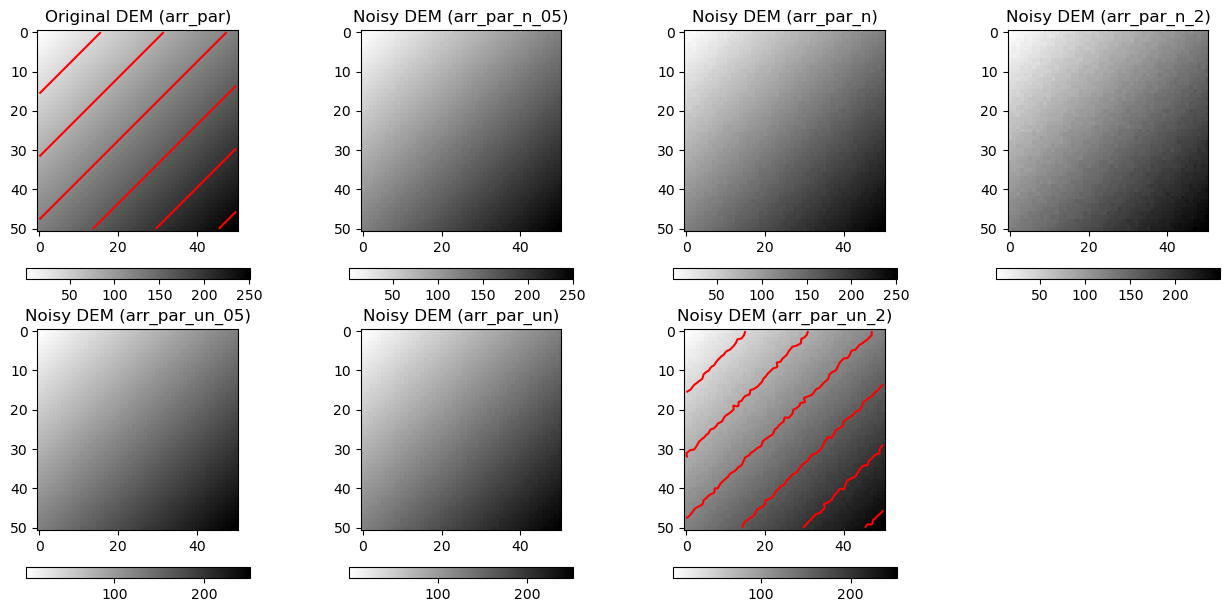

In [21]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_inc, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
plt.contour(arr_inc, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_par_n_05)')
plt.imshow(arr_inc_n_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_inc_n, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_inc_n_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 5)
ax5.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_inc_un_05, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 6)
ax6.set_title('Noisy DEM (arr_par_un)')
plt.imshow(arr_inc_un, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 7)
ax7.set_title('Noisy DEM (arr_par_un_2)')
plt.imshow(arr_inc_un_2, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
plt.contour(arr_inc_un_2, colors='red')

plt.show()

In [23]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_inc

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\inclined_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_ni:
    data = dict_ni[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\inclined" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

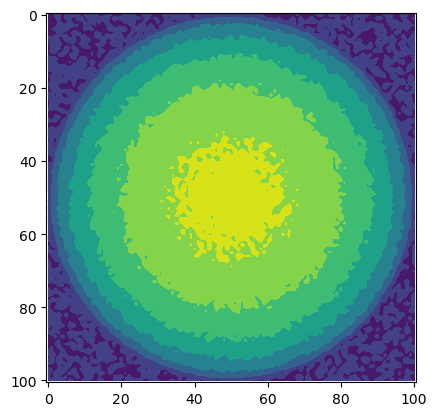

In [16]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemisphere_un_2.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='binary')
plt.contourf(arr[0], cmap)
# plt.show()

In [25]:
# surfaces
# │   │   current_hemicylinder.tif
# │   │   current_hemisphere.tif
# │   │   current_inclined.tif
# │   │   current_paraboloid.tif
# │   │
# │   ├───clear
# │   │       hemicylinder_clear.tif
# │   │       hemisphere_clear.tif
# │   │       inclined_clear.tif
# │   │       inclined_surface_clear.tif
# │   │       paraboloid_clear.tif
# │   │
# │   └───noisy
# │           hemicylinder_n_05.tif
# │           hemicylinder_n_1.tif
# │           hemicylinder_n_2.tif
# │           hemicylinder_un_05.tif
# │           hemicylinder_un_1.tif
# │           hemicylinder_un_2.tif
# │           hemisphere_n_05.tif
# │           hemisphere_n_1.tif
# │           hemisphere_n_2.tif
# │           hemisphere_un_05.tif
# │           hemisphere_un_1.tif
# │           hemisphere_un_2.tif
# │           inclined_n_05.tif
# │           inclined_n_1.tif
# │           inclined_n_2.tif
# │           inclined_un_05.tif
# │           inclined_un_1.tif
# │           inclined_un_2.tif
# │           paraboloid_n_05.tif
# │           paraboloid_n_1.tif
# │           paraboloid_n_2.tif
# │           paraboloid_un_05.tif
# │           paraboloid_un_1.tif
# │           paraboloid_un_2.tif

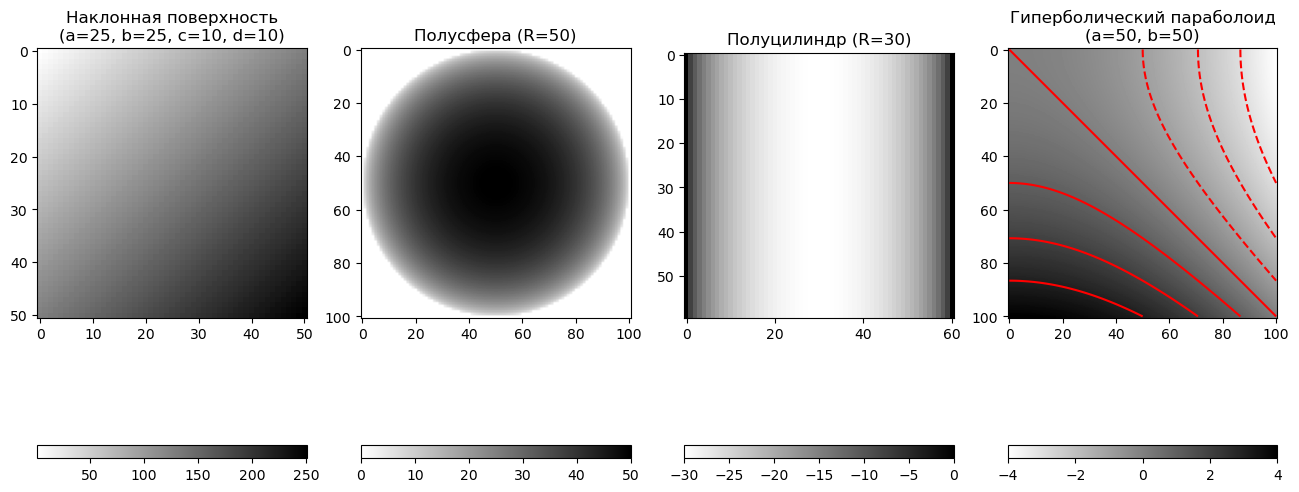

In [90]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title('Наклонная поверхность\n(a=25, b=25, c=10, d=10)')
plt.imshow(arr_inc, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contour(arr_inc, colors='red')

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title('Полусфера (R=50)')
plt.imshow(arr_sph, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title('Полуцилиндр (R=30)')
plt.imshow(arr_cyl, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title('Гиперболический параболоид\n(a=50, b=50)')
plt.imshow(arr_par, cmap='binary')
plt.colorbar(fraction=0.045, orientation='horizontal')
plt.contour(arr_par, colors='red')
# plt.contourf(arr_par, cmap='summer')